In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
from Map import Map
from Tabu import Tabu
from TwoStage import TwoStage
from L_shaped import MasterProblem as mp
import matplotlib.pyplot as plt
import matplotlib.pylab as pl 
import matplotlib.cm as cm
import time
import networkx as nx
import matplotlib as mpl

**Modelling Parameters**

In [3]:
rides = 5
bus = 2
scenarios = 25
MIPGap = 0.001
probability = [0.7, 0.1, 0.15, 0.05]

**Defining the Map**

In [4]:
mappy = Map(rides)

In [5]:
def Mod3():
    t3 = time.time()
    lshaped = mp(
        mappy,
        bus=bus,
        scenarios=scenarios,
#         probability=probability
    )
    lshaped.initialize()
    lshaped.model.params.MIPGap = MIPGap
    lshaped.optimize()
    t3 = time.time() - t3
    return lshaped, t3

**Plotting Functions**

In [6]:
def plot_trend(ub,lb,base):
    x = list(range(len(ub)))
    figure = plt.figure()
    plt.plot(x,ub,label='upper-bound')
    plt.plot(x,[base]*len(ub),label='two-stage')
    plt.plot(x,lb,label='lower-bound')
    plt.annotate(int(ub[-1]),[x[-1],ub[-1]])
    plt.legend()
    plt.savefig('./figures/trend.png')
    plt.show()

colors = ['green','blue','yellow','red','pink'] 
def displaygraph(n, e, modname):
    for k in e.keys():
        for i, j in e[k]:
            plt.plot((n[i][0],n[j][0]),(n[i][1],n[j][1]), color=colors[k] ,marker='o', linewidth=2, linestyle='dashed')
    for i in n:
        plt.annotate(i,n[i],textcoords="offset points",xytext=(0,10),ha='center')
    plt.savefig('./figures/'+modname+'.png')
    plt.show()


In [7]:
lshaped, t3 = Mod3()

Using license file C:\Users\Lavkesh\gurobi.lic
Academic license - for non-commercial use only
Changed value of parameter lazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter NodefileStart to 0.5
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Presolve to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter MIPFocus to 2
   Prev: 0  Min: 0  Max: 3  Default: 0
Parameter Heuristics unchanged
   Value: 0.05  Min: 0.0  Max: 1.0  Default: 0.05
Changed value of parameter MIPGap to 0.001
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
-75.64646329177594 -55.940487199999986
19.705976091775703 -2.5579538487363607e-13
-73.374178937338 -54.46899599999998
18.905182937337877 -1.4210854715202004e-13
-78.0204339295542 -57.95157840000001
20.06896888953947 0.00011335998527783886
-70.72753500275212 -54.307616400000015
18.390731790554895 1.97081318780279
-60.075589819291054 -46.605256000000004
16.065142626918806 2.594808807

     0     0   13.58282    0   50   15.98400   13.58282  15.0%     -    9s
     0     0   13.58365    0   50   15.98400   13.58365  15.0%     -    9s
     0     0   13.58389    0   51   15.98400   13.58389  15.0%     -    9s
     0     0   13.63364    0   56   15.98400   13.63364  14.7%     -   10s
     0     0   13.63950    0   56   15.98400   13.63950  14.7%     -   10s
     0     0   13.64181    0   60   15.98400   13.64181  14.7%     -   10s
     0     0   13.66364    0   51   15.98400   13.66364  14.5%     -   10s
     0     0   13.66917    0   56   15.98400   13.66917  14.5%     -   10s
     0     0   13.66918    0   54   15.98400   13.66918  14.5%     -   10s
     0     0   13.67323    0   57   15.98400   13.67323  14.5%     -   10s
     0     0   13.67405    0   60   15.98400   13.67405  14.5%     -   10s
     0     0   13.68528    0   60   15.98400   13.68528  14.4%     -   11s
     0     0   13.68984    0   62   15.98400   13.68984  14.4%     -   11s
     0     0   13.68986  

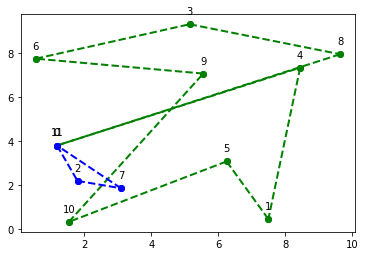

({0: (1.1790752618465983, 3.804337226896135),
  1: (7.493660552550208, 0.44946597137383026),
  2: (1.7935132388917607, 2.190058451687543),
  3: (5.143192139743032, 9.33277705483087),
  4: (8.443875479106406, 7.352442918743188),
  5: (6.2452481648868865, 3.0783718901398838),
  6: (0.5465155494760465, 7.762785137742748),
  7: (3.0899074724055953, 1.8570609029110396),
  8: (9.638596025888074, 7.96526144922805),
  9: (5.5511054882386714, 7.083193417779176),
  10: (1.531522460637481, 0.32077001797068627),
  11: (1.1790752618465983, 3.804337226896135)},
 {0: [(0, 4),
   (1, 5),
   (4, 1),
   (10, 9),
   (5, 10),
   (9, 6),
   (6, 3),
   (8, 0),
   (3, 8)],
  1: [(2, 7), (0, 2), (7, 0)]},
 [1, 2, 3, 4, 5])

In [8]:
nodes = mappy.node
edges = {k:[] for k in range(lshaped.bus)}
for i, j in lshaped.parameters.edges:
    for k in range(lshaped.bus):
        if lshaped.variables.x[i,j,k].X > 0.5:
            if j != lshaped.last:
                edges[k].append((i,j))
            else:
                edges[k].append((i,0))
bounds = lshaped.getcancel()
objlshaped = lshaped.model.ObjVal
displaygraph(nodes, edges,'L-Shaped')
nodes,edges,bounds

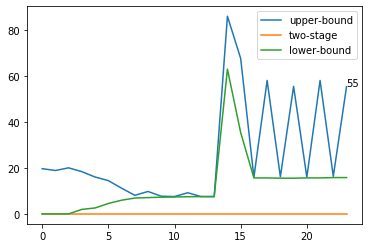

In [9]:
plot_trend(lshaped.upperbounds[1:],lshaped.lowerbounds[1:],0)

In [10]:
lshaped.printsol(lshaped.submodel)

Routing for bus 1
+---------+------+-------------+---------------+
| Pick-up | Drop | Pickup time | Drop-off time |
+---------+------+-------------+---------------+
|    0    |  4   |    8:44     |     9:08      |
+---------+------+-------------+---------------+
|    1    |  5   |    9:39     |     9:58      |
+---------+------+-------------+---------------+
|    4    |  1   |    9:08     |     9:39      |
+---------+------+-------------+---------------+
|   10    |  9   |    10:23    |     10:57     |
+---------+------+-------------+---------------+
|    5    |  10  |    9:58     |     10:23     |
+---------+------+-------------+---------------+
|    9    |  6   |    10:57    |     11:22     |
+---------+------+-------------+---------------+
|    6    |  3   |    11:22    |     11:47     |
+---------+------+-------------+---------------+
|    8    |  11  |    12:12    |     12:49     |
+---------+------+-------------+---------------+
|    3    |  8   |    11:47    |     12:12     |
+-

+---------+------+-------------+---------------+
Scenario 11 Routing for bus 2
+---------+------+-------------+---------------+
| Pick-up | Drop | Pickup time | Drop-off time |
+---------+------+-------------+---------------+
|    2    |  7   |    8:42     |     8:55      |
+---------+------+-------------+---------------+
|    0    |  2   |    8:36     |     8:42      |
+---------+------+-------------+---------------+
|    7    |  11  |    8:55     |     9:14      |
+---------+------+-------------+---------------+
Scenario 12 Routing for bus 1
+---------+------+-------------+---------------+
| Pick-up | Drop | Pickup time | Drop-off time |
+---------+------+-------------+---------------+
|    0    |  7   |    8:46     |     8:55      |
+---------+------+-------------+---------------+
|    1    |  5   |    9:47     |     10:06     |
+---------+------+-------------+---------------+
|    5    |  10  |    10:06    |     10:48     |
+---------+------+-------------+---------------+
|   10   

+---------+------+-------------+---------------+
Scenario 19 Routing for bus 2
+---------+------+-------------+---------------+
| Pick-up | Drop | Pickup time | Drop-off time |
+---------+------+-------------+---------------+
|    2    |  7   |    8:32     |     8:45      |
+---------+------+-------------+---------------+
|    0    |  2   |    8:26     |     8:32      |
+---------+------+-------------+---------------+
|    7    |  11  |    8:45     |     9:04      |
+---------+------+-------------+---------------+
Scenario 20 Routing for bus 1
+---------+------+-------------+---------------+
| Pick-up | Drop | Pickup time | Drop-off time |
+---------+------+-------------+---------------+
|    0    |  4   |    8:44     |     9:08      |
+---------+------+-------------+---------------+
|    1    |  5   |    9:39     |     9:58      |
+---------+------+-------------+---------------+
|    4    |  1   |    9:08     |     9:39      |
+---------+------+-------------+---------------+
|   10   

In [11]:
(sum(lshaped.variables.h[i,j].X for i,j in lshaped.variables.h.keys()),
sum(lshaped.variables.p_l[j].X for j in lshaped.variables.p_l.keys()))

(0.0, 0.0)

In [12]:
lshaped.submodel[3].sim.alpha

{0: 1, 11: 1, 1: 1, 6: 1, 2: 0, 7: 0, 3: 1, 8: 1, 4: 1, 9: 1, 5: 1, 10: 1}